In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv('D:\Data Science\Portofolio\Data_Analysis_RFM\RFM_Analysis\Data\Online Shopping.csv')
df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


1. CustomerID: ID unik untuk setiap pelanggan.
1. Gender: Jenis kelamin pelanggan (mis., Pria, Wanita).
1. Lokasi: Informasi lokasi atau alamat pelanggan.
1. TenureMonths: Jumlah bulan pelanggan telah terhubung dengan platform.
1. TransactionID: ID unik untuk setiap transaksi.
1. TransactionDate: Tanggal transaksi.
1. Product_SKU: Pengenal Stock Keeping Unit (SKU) untuk produk.
1. Product_Description: Deskripsi produk.
1. Category_Product: Kategori tempat produk berada.
1. Quantity: Kuantitas produk yang dibeli dalam transaksi.
1. Avg_Price: Harga rata-rata produk.
1. Delivery_Charges : Biaya yang terkait dengan pengiriman produk.
1. Cupon_Status: Status kupon yang terkait dengan transaksi.
1. GST: Pajak Barang dan Jasa yang terkait dengan transaksi.
1. Date: Tanggal transaksi (berpotensi redundan dengan Tanggal_Transaksi).
1. Offline_Spend: Jumlah yang dibelanjakan secara offline oleh pelanggan.
1. Online_Spend: Jumlah yang dibelanjakan secara online oleh pelanggan.
1. Month: Bulan terjadinya transaksi.
1. Coupon_Code: Kode yang terkait dengan kupon, jika ada.
1. Discount_pct: Persentase diskon yang diterapkan pada transaksi

# Data Cleaning

## Missing Value

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

In [28]:
df.isna().mean() * 100

Unnamed: 0             0.000000
CustomerID             0.058540
Gender                 0.058540
Location               0.058540
Tenure_Months          0.058540
Transaction_ID         0.058540
Transaction_Date       0.058540
Product_SKU            0.058540
Product_Description    0.058540
Product_Category       0.000000
Quantity               0.058540
Avg_Price              0.058540
Delivery_Charges       0.058540
Coupon_Status          0.058540
GST                    0.058540
Date                   0.058540
Offline_Spend          0.058540
Online_Spend           0.058540
Month                  0.000000
Coupon_Code            0.755358
Discount_pct           0.755358
dtype: float64

In [29]:
df.dropna(inplace=True)

## Data Duplicates

In [30]:
df.duplicated().sum()

np.int64(0)

## Outlier

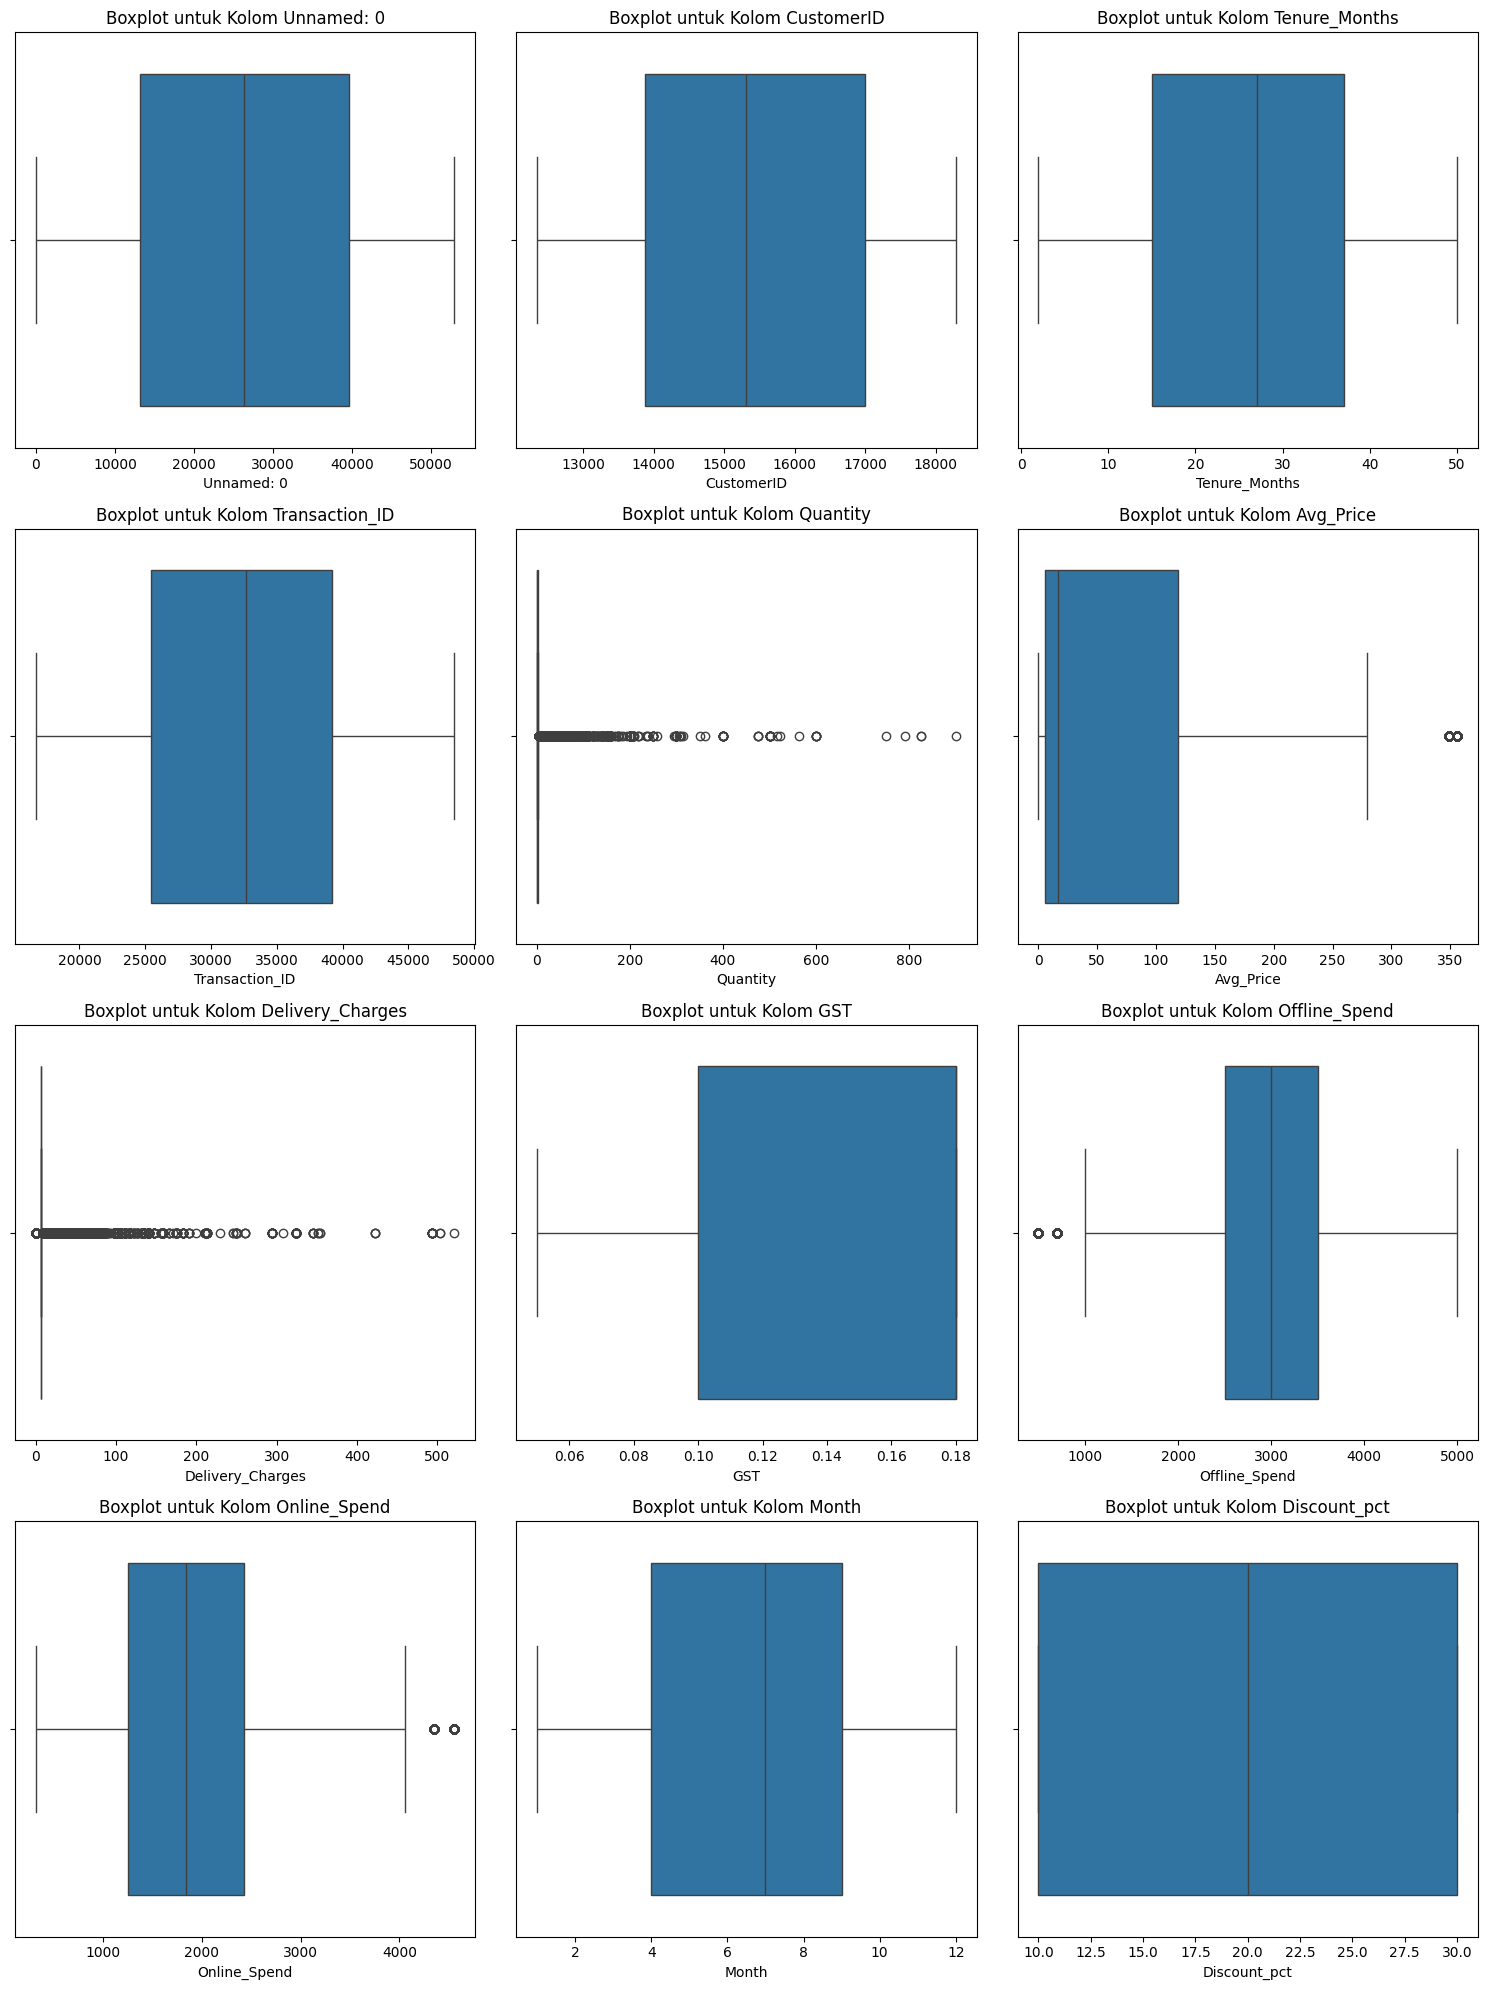

In [31]:
# Fungsi untuk membuat boxplot dalam subplot
def buat_boxplot_subplots(df, kolom_numerik):
    # Menentukan jumlah baris dan kolom untuk subplot
    n = len(kolom_numerik)
    baris = (n // 3) + (1 if n % 3 != 0 else 0)  # 3 subplot per baris

    # Membuat figure dan axes untuk subplot
    fig, axes = plt.subplots(baris, 3, figsize=(15, 5 * baris))
    axes = axes.flatten()  # Meratakan array axes untuk iterasi

    # Membuat boxplot untuk setiap kolom numerik
    for i, kolom in enumerate(kolom_numerik):
        sns.boxplot(x=df[kolom], ax=axes[i])
        axes[i].set_title(f"Boxplot untuk Kolom {kolom}")

    # Menyembunyikan axes yang tidak digunakan jika jumlah kolom tidak kelipatan 3
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Memberikan jarak antar subplot
    plt.tight_layout()
    plt.show()

# Mendapatkan list nama kolom numerik
kolom_numerik = df.select_dtypes(include=['number']).columns.tolist()

# Memanggil fungsi untuk membuat boxplot
buat_boxplot_subplots(df, kolom_numerik)

## Data Type

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52524 entries, 0 to 52923
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52524 non-null  int64  
 1   CustomerID           52524 non-null  float64
 2   Gender               52524 non-null  object 
 3   Location             52524 non-null  object 
 4   Tenure_Months        52524 non-null  float64
 5   Transaction_ID       52524 non-null  float64
 6   Transaction_Date     52524 non-null  object 
 7   Product_SKU          52524 non-null  object 
 8   Product_Description  52524 non-null  object 
 9   Product_Category     52524 non-null  object 
 10  Quantity             52524 non-null  float64
 11  Avg_Price            52524 non-null  float64
 12  Delivery_Charges     52524 non-null  float64
 13  Coupon_Status        52524 non-null  object 
 14  GST                  52524 non-null  float64
 15  Date                 52524 non-null  obje

In [33]:
df.drop(columns=['Unnamed: 0','Date'],axis=1,inplace=True)

In [34]:
df[['Transaction_ID','CustomerID']] = df[['Transaction_ID','CustomerID']].astype('object')
df['Transaction_Date']= pd.to_datetime(df['Transaction_Date'])

In [35]:
df[['Tenure_Months','Month','Quantity']] = df[['Tenure_Months','Month','Quantity']].astype('int64')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52524 entries, 0 to 52923
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52524 non-null  object        
 1   Gender               52524 non-null  object        
 2   Location             52524 non-null  object        
 3   Tenure_Months        52524 non-null  int64         
 4   Transaction_ID       52524 non-null  object        
 5   Transaction_Date     52524 non-null  datetime64[ns]
 6   Product_SKU          52524 non-null  object        
 7   Product_Description  52524 non-null  object        
 8   Product_Category     52524 non-null  object        
 9   Quantity             52524 non-null  int64         
 10  Avg_Price            52524 non-null  float64       
 11  Delivery_Charges     52524 non-null  float64       
 12  Coupon_Status        52524 non-null  object        
 13  GST                  52524 non-null 

# Data Exploration

## RFM Analysis

In [37]:
df['Total_Spend'] = df['Offline_Spend'] + df['Online_Spend']

In [38]:
cut_off_date = df['Transaction_Date'].max()

rfm = df.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (cut_off_date - x.max()).days,  # Recency
    'CustomerID': 'count',  # Frequency
    'Total_Spend': 'sum'  # Monetary
}).rename(columns={
    'Transaction_Date': 'Recency',
    'CustomerID': 'Frequency',
    'Total_Spend': 'Monetary'
}).reset_index()

print(rfm.head())

   CustomerID  Recency  Frequency   Monetary
0     12346.0      107          2   11093.34
1     12347.0       59         59  243355.54
2     12348.0       73         23  121977.33
3     12350.0       17         17  126383.27
4     12356.0      107         36  199680.12


In [39]:
rfm['r_score'] = pd.qcut(rfm['Recency'], q = 5, labels = ['5','4','3','2','1'])
rfm['f_score'] = pd.qcut(rfm['Frequency'], q = 5, labels = ['1','2','3','4','5'])
rfm['m_score'] = pd.qcut(rfm['Monetary'], q = 5, labels = ['1','2','3','4','5'])

# Combine all scores
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_score
0,12346.0,107,2,11093.34,3,1,1,31
1,12347.0,59,59,243355.54,4,5,4,45
2,12348.0,73,23,121977.33,4,3,3,43
3,12350.0,17,17,126383.27,5,3,3,53
4,12356.0,107,36,199680.12,3,4,4,34


In [40]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CustomerID  1468 non-null   float64 
 1   Recency     1468 non-null   int64   
 2   Frequency   1468 non-null   int64   
 3   Monetary    1468 non-null   float64 
 4   r_score     1468 non-null   category
 5   f_score     1468 non-null   category
 6   m_score     1468 non-null   category
 7   rfm_score   1468 non-null   object  
dtypes: category(3), float64(2), int64(2), object(1)
memory usage: 62.4+ KB


Urutan Segment (r:f):
1. champions 5:5-4
1. loyal_customers 4-3:5-4
1. potential_loyalists 4-5:3-2
1. promising 4:1
1. cant_loose 2-1:5
1. at_risk 2-1:4-3
1. about_to_sleep 3:2-1
1. hibernating 2-1:2-1
1. need_attention 3:3




In [42]:
seg_map = {
r'[1-2][1-2]': 'hibernating',
r'[1-2][3-4]': 'at_risk',
r'[1-2]5': 'cant_loose',
r'3[1-2]': 'about_to_sleep',
r'33': 'need_attention',
r'[3-4][4-5]': 'loyal_customers',
r'41': 'promising',
r'51': 'new_customers',
r'[4-5][2-3]': 'potential_loyalists',
r'5[4-5]': 'champions'
    }

rfm['Segment'] = rfm['rfm_score'].replace(seg_map, regex=True)

In [46]:
rfm[rfm['Segment'] == 'champions']

,CustomerID,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_score,Segment
8,12377.0,40,76,274936.29,5,5,5,55,champions
25,12431.0,40,44,200708.53,5,4,4,54,champions
33,12471.0,15,127,646767.84,5,5,5,55,champions
47,12502.0,15,31,220626.38,5,4,4,54,champions
54,12528.0,34,31,180406.98,5,4,4,54,champions
...,...,...,...,...,...,...,...,...,...
1415,18055.0,26,96,456391.73,5,5,5,55,champions
1439,18145.0,33,42,183760.92,5,4,4,54,champions
1445,18178.0,12,35,227580.17,5,4,4,54,champions
1459,18239.0,34,52,174052.29,5,4,4,54,champions


In [44]:
rfm['Segment'].value_counts()

Segment
hibernating            308
loyal_customers        258
potential_loyalists    210
at_risk                202
champions              147
about_to_sleep         126
cant_loose              77
need_attention          53
promising               46
new_customers           41
Name: count, dtype: int64

In [47]:
rfm

,CustomerID,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_score,Segment
0,12346.0,107,2,11093.34,3,1,1,31,about_to_sleep
1,12347.0,59,59,243355.54,4,5,4,45,loyal_customers
2,12348.0,73,23,121977.33,4,3,3,43,potential_loyalists
3,12350.0,17,17,126383.27,5,3,3,53,potential_loyalists
4,12356.0,107,36,199680.12,3,4,4,34,loyal_customers
...,...,...,...,...,...,...,...,...,...
1463,18259.0,270,6,29056.08,1,1,1,11,hibernating
1464,18260.0,87,39,215519.34,4,4,4,44,loyal_customers
1465,18269.0,194,8,38418.35,2,1,2,21,hibernating
1466,18277.0,69,1,4653.81,4,1,1,41,promising


In [48]:
df

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Total_Spend
0,17850.0,M,Chicago,12,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.10,4500.0,2424.50,1,ELEC10,10.0,6924.50
1,17850.0,M,Chicago,12,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.10,4500.0,2424.50,1,ELEC10,10.0,6924.50
2,17850.0,M,Chicago,12,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,0.10,4500.0,2424.50,1,ELEC10,10.0,6924.50
3,17850.0,M,Chicago,12,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,0.10,4500.0,2424.50,1,ELEC10,10.0,6924.50
4,17850.0,M,Chicago,12,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,0.10,4500.0,2424.50,1,ELEC10,10.0,6924.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,F,California,8,22504.0,2019-03-10,GGOEGGCX056399,Gift Card - $250.00,Gift Cards,1,250.00,0.0,Clicked,0.05,2500.0,1294.22,3,GC30,30.0,3794.22
52920,18077.0,M,Chicago,34,24250.0,2019-03-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1,25.00,0.0,Used,0.05,2000.0,1066.12,3,GC30,30.0,3066.12
52921,16085.0,M,California,15,39991.0,2019-10-06,GGOEGOCD078399,Google Leather Perforated Journal,Notebooks & Journals,1,10.80,6.0,Clicked,0.05,3000.0,2230.76,10,NJ10,10.0,5230.76
52922,16085.0,M,California,15,39991.0,2019-10-06,GGOEGOCR078499,Google Spiral Leather Journal,Notebooks & Journals,1,9.60,6.0,Used,0.05,3000.0,2230.76,10,NJ10,10.0,5230.76
